In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.model_selection import train_test_split
X = load_boston().data
Y = load_boston().target
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [3]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

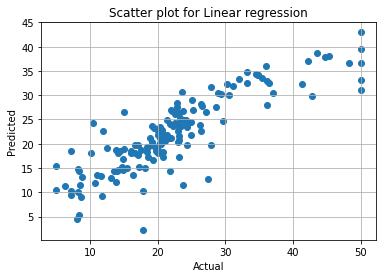

In [4]:
iter=100
clf_ = SGDRegressor(max_iter=iter)
clf_.fit(x_train, y_train)
y_pred=clf_.predict(x_test)
plt.scatter(y_test,y_pred)
plt.grid()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter plot for Linear regression')
plt.show()

In [ ]:
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

Mean Squared Error : 27.271341738353982


# Implementing SGD

In [5]:
def SGD_imp(train_data,iterations,r,batch_size):
    
    w=np.zeros(shape=(1,train_data.shape[1]-1))
    b=0
    
    j=1
    while(j<=iterations): 

        batch_data=train_data.sample(batch_size)
        
        y_train=np.array(batch_data['price'])
        x_train=np.array(batch_data.drop('price',axis=1))
        
        w_grad=np.zeros(shape=(1,train_data.shape[1]-1))
        b_grad=0
        
        for i in range(batch_size): 
            pred=np.dot(w,x_train[i])+b
            w_grad=w_grad+(-2)*x_train[i]*(y_train[i]-(pred))
            b_grad=b_grad+(-2)*(y_train[i]-(pred))
        
        w=w-r*(w_grad/batch_size)
        b=b-r*(b_grad/batch_size)
        
        j += 1

        r=r/1
        
    return w,b 
    


In [6]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

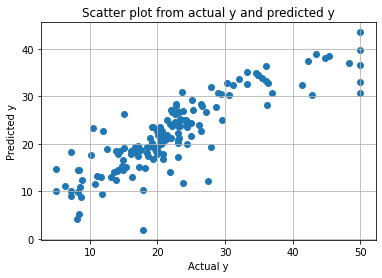

In [55]:
data=pd.DataFrame(x_train)
data['price']=y_train
w,b=SGD_imp(data,1000,.01,50)
y_pred=predict(x_test,w,b)

plt.scatter(y_test,y_pred)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()


In [56]:
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

Mean Squared Error : 26.58601396094374


In [57]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["SGD","MSE"]
table.add_row(["Custom SGD",26.58601396094374])
table.add_row(["Sklearn SGD",27.271341738353982])
print(table)

+-------------+--------------------+
|     SGD     |        MSE         |
+-------------+--------------------+
|  Custom SGD | 26.58601396094374  |
| Sklearn SGD | 27.271341738353982 |
+-------------+--------------------+
